# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_ls =[]
lat = []
lng = []
max_temp = []
dt = []
hum = []
cloud = []
wind = []
country = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:   
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        dt.append(response['dt'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_ls.append(city)
        country.append(response['sys']['country'])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
weather_df = pd.DataFrame({"City": city_ls,
                           "Lat": lat,
                           "Long": lng,
                           "Max_Temp": max_temp,
                           "Date": dt,
                           "Humidity": hum,
                           "Cloudiness": cloud,
                           "Wind_Speed": wind,
                           "Country": country
})

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv(output_data_file)
weather_df

,City,Lat,Long,Max_Temp,Date,Humidity,Cloudiness,Wind_Speed,Country
0,hermanus,-34.42,19.23,13.89,1592761860,90,65,2.35,ZA
1,yerbogachen,61.28,108.01,18.12,1592761860,55,61,1.77,RU
2,bredasdorp,-34.53,20.04,15.00,1592761860,93,81,0.97,ZA
3,port elizabeth,-33.92,25.57,16.00,1592761634,77,0,5.70,ZA
4,assiniboia,49.63,-105.98,17.03,1592761729,54,13,3.27,CA
...,...,...,...,...,...,...,...,...,...
563,srikakulam,18.30,83.90,29.15,1592761982,68,75,5.03,IN
564,rosario,-32.95,-60.64,20.56,1592761766,42,38,6.70,AR
565,jalor,25.35,72.62,34.03,1592761975,47,31,6.58,IN
566,muros,42.78,-9.06,19.44,1592761982,92,64,1.79,ES


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data = weather_df[weather_df.Humidity < 100]
clean_city_data

,City,Lat,Long,Max_Temp,Date,Humidity,Cloudiness,Wind_Speed,Country
0,hermanus,-34.42,19.23,13.89,1592761860,90,65,2.35,ZA
1,yerbogachen,61.28,108.01,18.12,1592761860,55,61,1.77,RU
2,bredasdorp,-34.53,20.04,15.00,1592761860,93,81,0.97,ZA
3,port elizabeth,-33.92,25.57,16.00,1592761634,77,0,5.70,ZA
4,assiniboia,49.63,-105.98,17.03,1592761729,54,13,3.27,CA
...,...,...,...,...,...,...,...,...,...
563,srikakulam,18.30,83.90,29.15,1592761982,68,75,5.03,IN
564,rosario,-32.95,-60.64,20.56,1592761766,42,38,6.70,AR
565,jalor,25.35,72.62,34.03,1592761975,47,31,6.58,IN
566,muros,42.78,-9.06,19.44,1592761982,92,64,1.79,ES


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

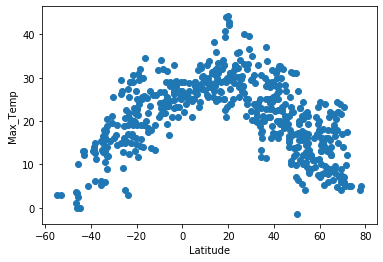

In [17]:
x_values = clean_city_data.Lat
y_values = clean_city_data.Max_Temp
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max_Temp')
plt.show()

## Latitude vs. Humidity Plot

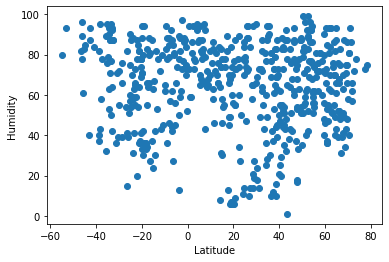

In [18]:
x_values = clean_city_data.Lat
y_values = clean_city_data.Humidity
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

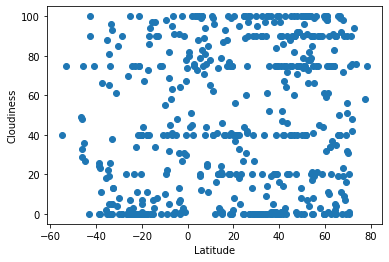

In [19]:
x_values = clean_city_data.Lat
y_values = clean_city_data.Cloudiness
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

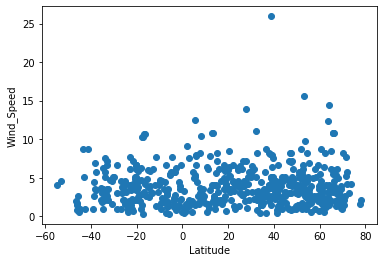

In [20]:
x_values = clean_city_data.Lat
y_values = clean_city_data.Wind_Speed
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [22]:
# Create Northern and Southern Hemisphere DataFrames
n_hem = clean_city_data[clean_city_data.Lat >= 0]
s_hem = clean_city_data[clean_city_data.Lat < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5197325447050996


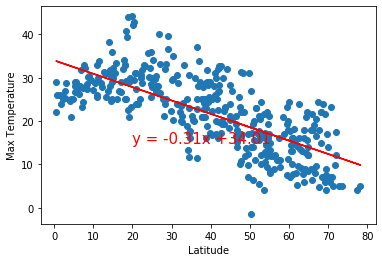

In [29]:
#assign values
x_values = n_hem.Lat
y_values = n_hem.Max_Temp


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5418264662547994


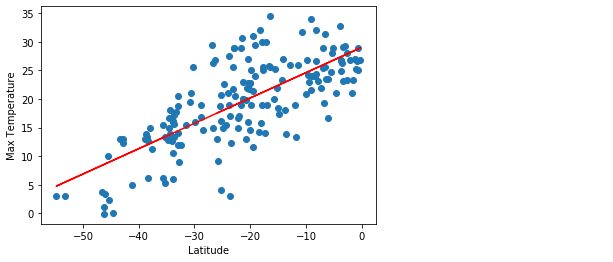

In [30]:
#assign values
x_values = s_hem.Lat
y_values = s_hem.Max_Temp


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.89661199788497e-06


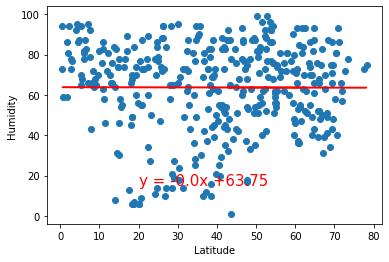

In [32]:
#assign values
x_values = n_hem.Lat
y_values = n_hem.Humidity


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010445684446108197


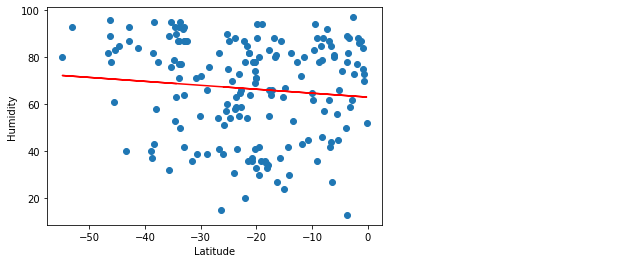

In [33]:
#assign values
x_values = s_hem.Lat
y_values = s_hem.Humidity


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.4270902559475671e-05


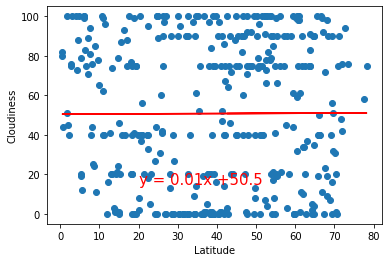

In [34]:
#assign values
x_values = n_hem.Lat
y_values = n_hem.Cloudiness


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005689966015625855


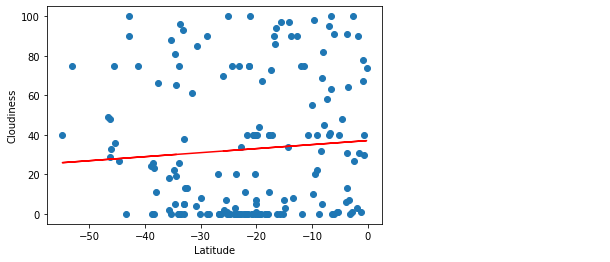

In [35]:
#assign values
x_values = s_hem.Lat
y_values = s_hem.Cloudiness


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001243115245342554


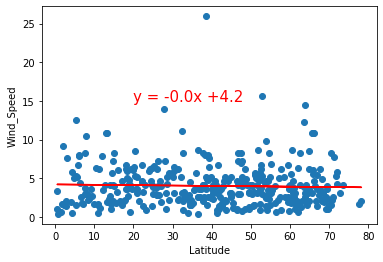

In [36]:
#assign values
x_values = n_hem.Lat
y_values = n_hem.Wind_Speed


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 4.640411515365862e-06


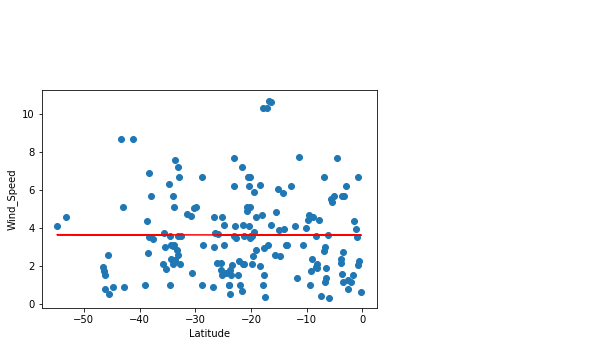

In [38]:
#assign values
x_values = s_hem.Lat
y_values = s_hem.Wind_Speed


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")



# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()